<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Deep_Learning_%7C_Handling_Imbalanced_Dataset_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Load libraries and Dataset***

In [1]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/14_imbalanced'

customer_churn.csv
handling_imbalanced_data_exercise.md
handling_imbalanced_data_exercise_solution_telecom_churn.ipynb
handling_imbalanced_data.ipynb


In [4]:
df = pd.read_csv('/content/drive/MyDrive/py-master/DeepLearningML/14_imbalanced/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.Churn.value_counts() # the data set is clearly imbalanced.

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
#define crosstab
tab = pd.crosstab(index=df['Churn'], columns='count')

#find proportions 
round(tab*100/tab.sum(),2)

col_0,count
Churn,
No,73.46
Yes,26.54


# ***Theory of Imbalanced Dataset***

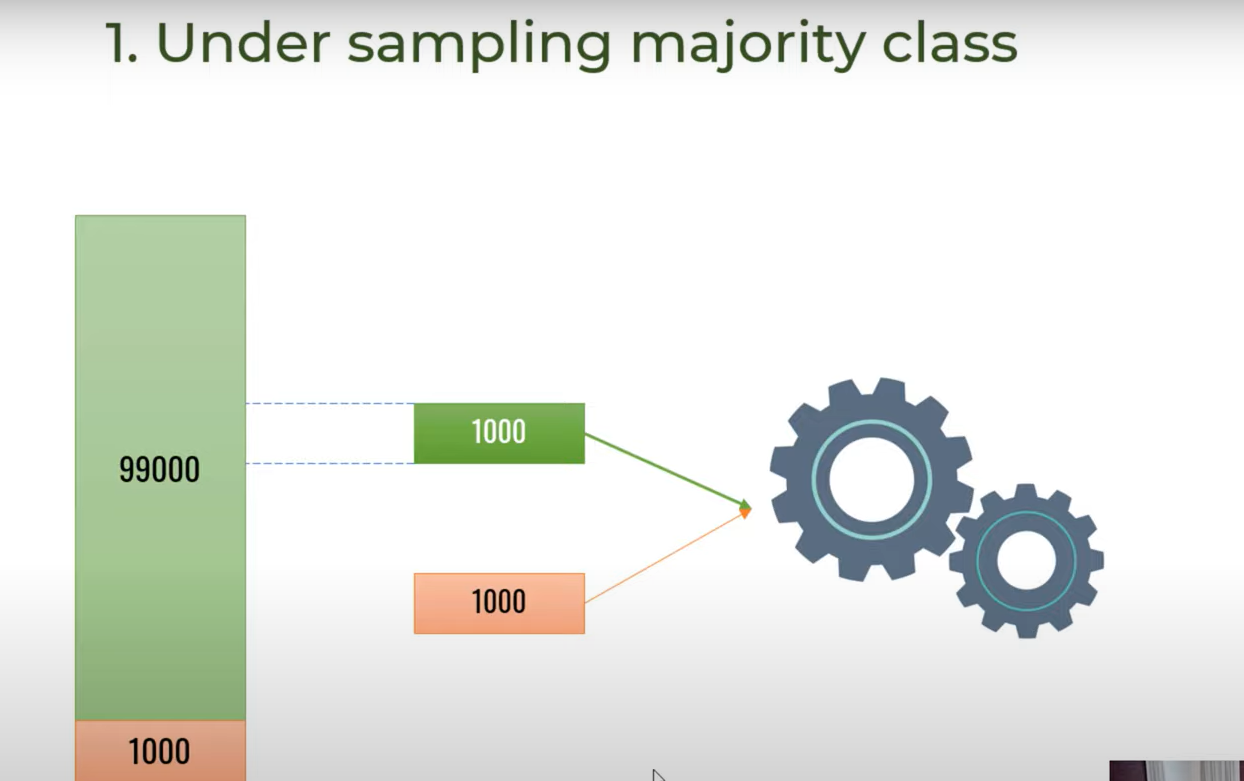

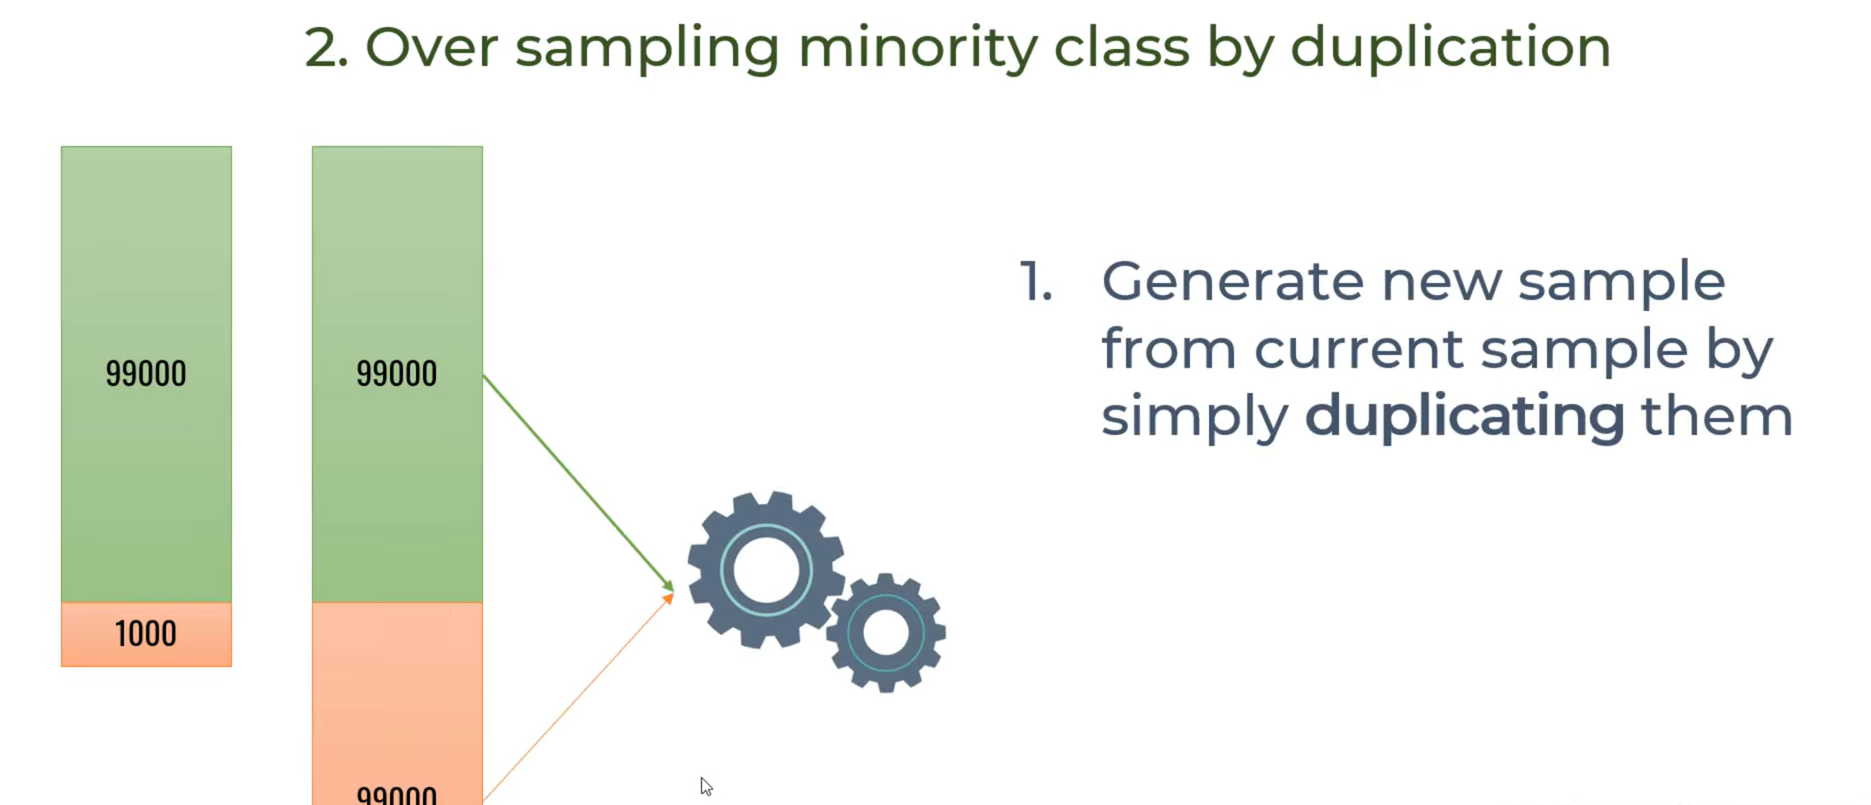

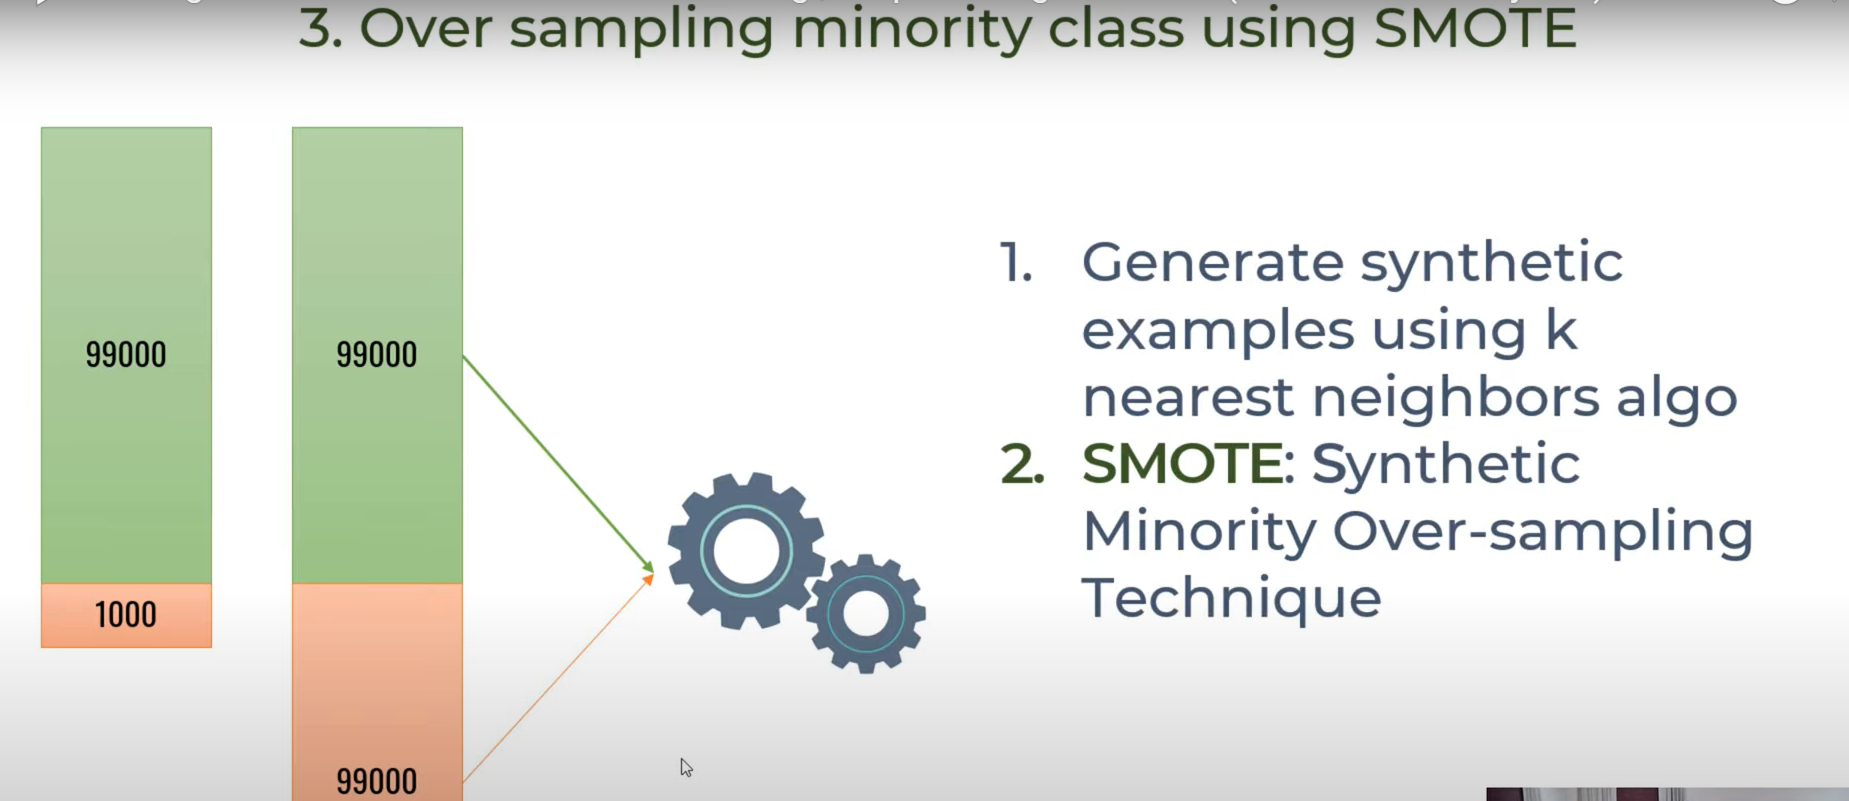

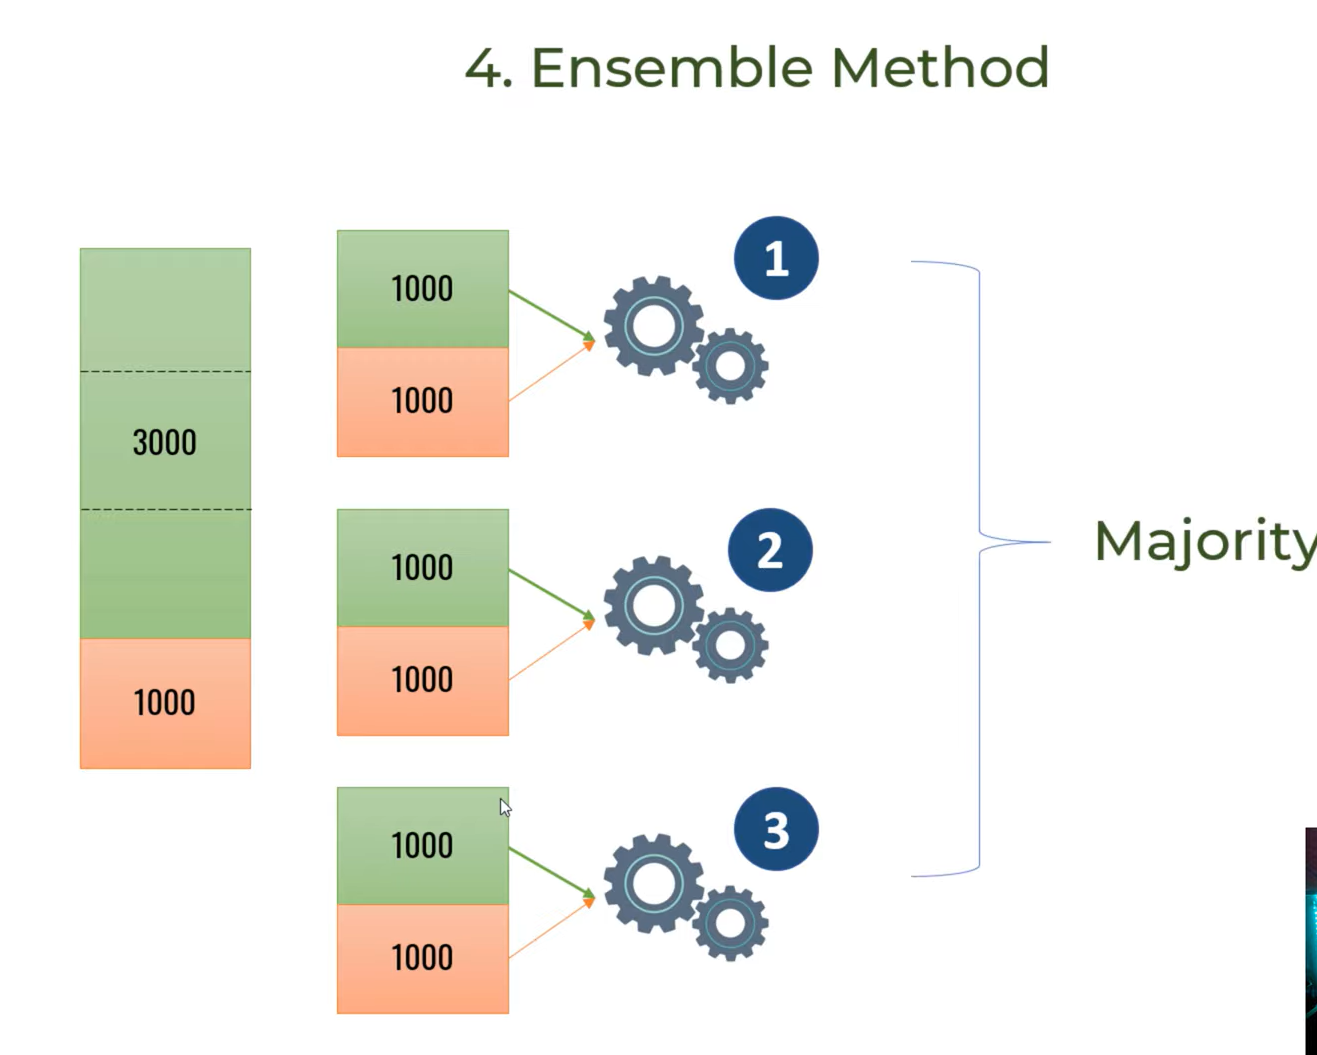

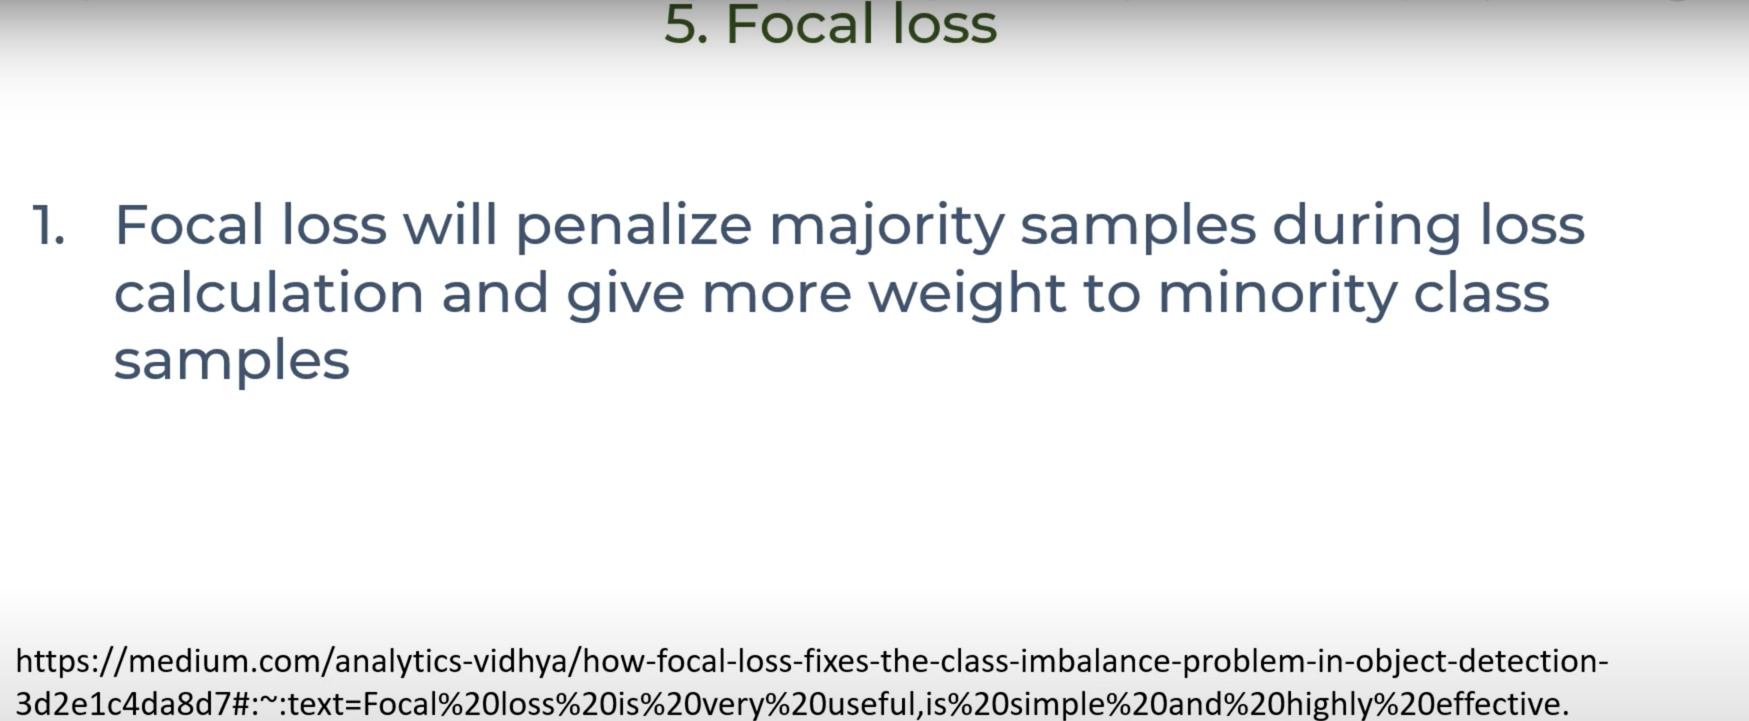

# ***Data preparation and EDA***

In [8]:
# to drop the column and update the same dataframe use inplace = True
df.drop('customerID', axis='columns', inplace=True)

In [9]:
# convert to number
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [11]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.TotalCharges= pd.to_numeric(df1.TotalCharges, errors='coerce')

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

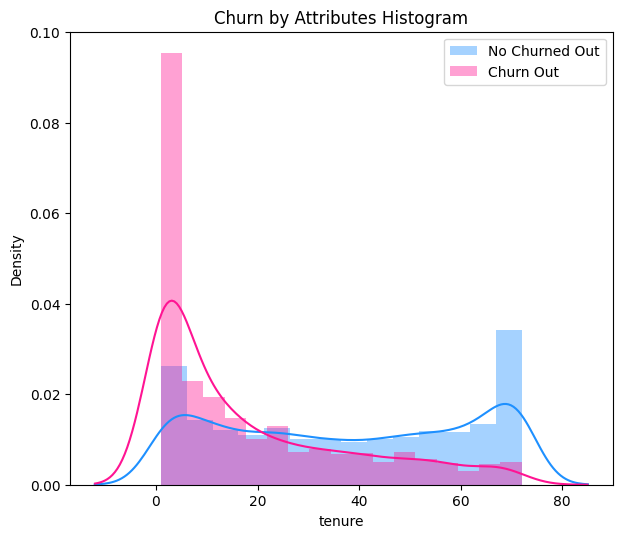

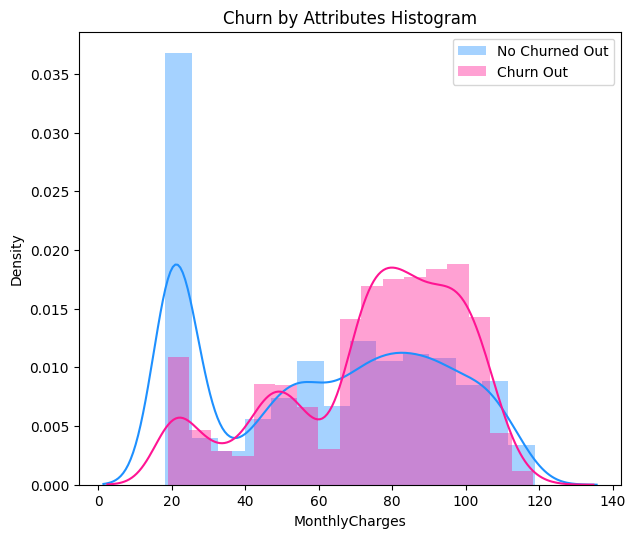

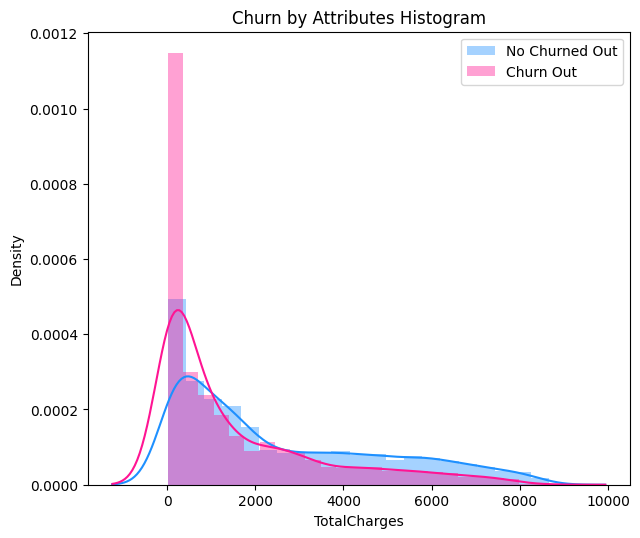

In [16]:
# doing Exploratory data Analysis
col_names = ['tenure','MonthlyCharges','TotalCharges',]

for i in col_names:

    plt.subplots(figsize=(7,6), dpi=100)
    sns.distplot( df1.loc[df1['Churn']=='No', i] , color="dodgerblue", label="No Churned Out")
    sns.distplot( df1.loc[df1['Churn']=='Yes', i] , color="deeppink", label="Churn Out")
    plt.title('Churn by Attributes Histogram')
    plt.legend();




In [17]:
  # find out unique values in each column
def print_datatypes(df1):
    for column in df1:
      if df1[column].dtypes=='object':
        print(f'{column} : {df1[column].unique()}')

In [18]:
print_datatypes(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
df1.replace('Bank transfer (automatic)', 'Bank transfer', inplace=True)
df1.replace('Credit card (automatic)', 'CC', inplace=True)


In [20]:
print_datatypes(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer' 'CC']
Churn : ['No' 'Yes']


In [21]:
# convert Yes n No column to 1 & 0
binary_columns  = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in binary_columns:
  df1[i].replace({'Yes':1,'No':0}, inplace=True)

df1['gender'].replace({'Male':1,'Female':0}, inplace=True)
  

In [22]:
print_datatypes(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer' 'CC']


In [23]:
for column in df1:
  print(f'{column} : {df1[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer' 'CC']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [24]:
# Now doing one hot encoding for columns that has more than 2 unique values
df2= pd.get_dummies(data = df1, columns =['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer', 'PaymentMethod_CC',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.drop('InternetService_No', axis ='columns', inplace=True)
df2.drop('Contract_Two year', axis ='columns', inplace=True)
df2.drop('PaymentMethod_Mailed check', axis ='columns', inplace=True)



In [26]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer,PaymentMethod_CC,PaymentMethod_Electronic check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,0,1
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,1,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,1,0,0,0,1


In [27]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year',
       'PaymentMethod_Bank transfer', 'PaymentMethod_CC',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [28]:
df2.shape

(7032, 24)

# ***Creating the model in old school method***

In [29]:
# scaling to be done on the columns like tenure, monthly charges and total charges
cols_to_scale =['TotalCharges','MonthlyCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [30]:
df2.head() # now data frame is ready to be used

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer,PaymentMethod_CC,PaymentMethod_Electronic check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,1,0,0,0,1
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,1,0,0,0
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,1,0,0,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,1,1,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,1,0,0,0,1


In [31]:
x= df2.drop('Churn', axis='columns')
y= df2.Churn

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
len(xtrain),len(xtest)

(5625, 1407)

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(20,input_shape=(23,), activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics = ['accuracy'])


In [34]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5355 - accuracy: 0.7330
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7932
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8025
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8073
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accura

In [35]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.7811


[0.45040184259414673, 0.7810945510864258]

In [36]:
yp = model.predict(xtest)

In [37]:
ypred =[]
for i in yp:
  if i>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Actual')

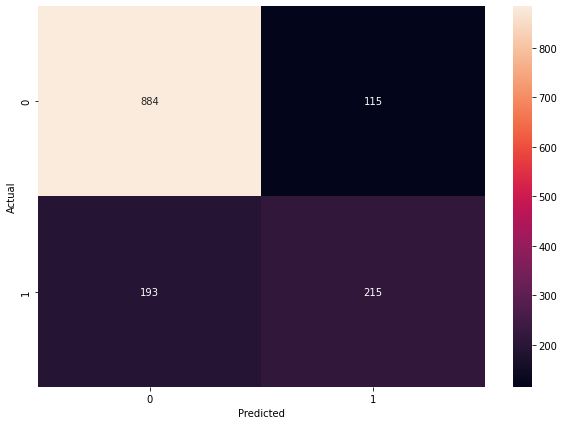

In [39]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=ytest, predictions= ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ***Now We will start learning how to use techniques to handle imbalanced dataset***

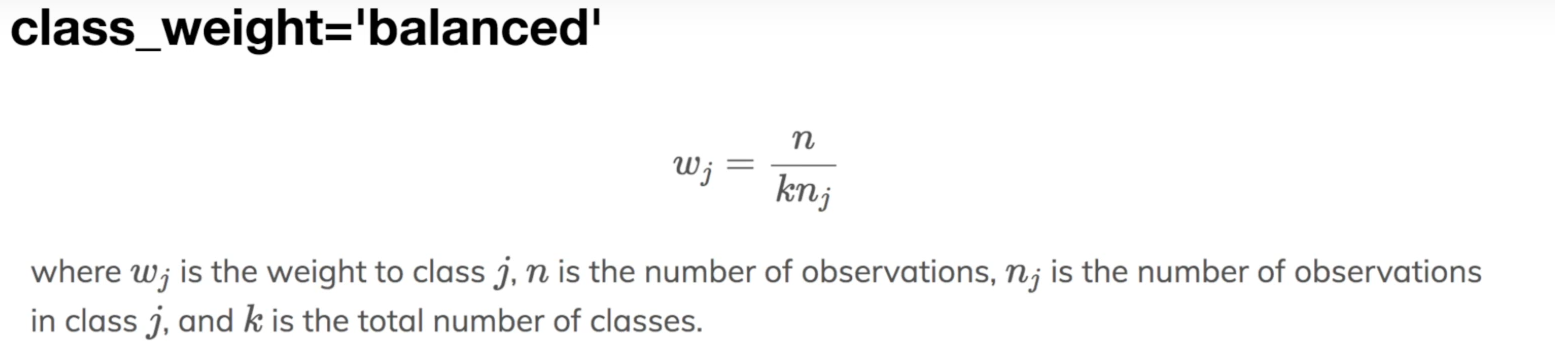

In [40]:
def ANN(xtrain,ytrain,xtest,ytest,optimizer,loss,weights):
  model = keras.Sequential([
                          keras.layers.Dense(20,input_shape=(23,), activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

  model.compile(optimizer = optimizer, loss =loss, metrics = ['accuracy'])
  if weights ==-1:
    model.fit(xtrain,ytrain,epochs=100,verbose=0)
  else:
    class_weight = {0: 0.62, 1: 1.88}
    model.fit(xtrain,ytrain,epochs=100, class_weight=class_weight,verbose=0)
  model.evaluate(xtest,ytest)
  ypred = np.round(model.predict(xtest),0)
  from sklearn.metrics import classification_report, confusion_matrix
  report= classification_report(ytest,ypred,output_dict=True)
  macro_precision =  report['macro avg']['precision'] 
  macro_recall = report['macro avg']['recall']    
  macro_f1 = report['macro avg']['f1-score']
  return ypred, macro_precision, macro_recall,macro_f1



In [59]:
optimizer = ['Adam','Adadelta','Adamax','Adagrad','Ftrl','Nadam']
loss = ['binary_crossentropy','categorical_crossentropy','hinge','huber_loss','poisson']
weight = [-1,0]
precisions = []
recalls = []
f1s = []
L=[]
for i in optimizer:
  for j in loss:
    for k in weight:
      ypred, macro_precision,macro_recall,macro_f1 = ANN(xtrain,ytrain,xtest,ytest,i,j,k)
      optimizers = i
      losses = j
      weights = k
      precisions = macro_precision
      recalls = macro_recall
      f1s = macro_f1
      dat= [[i,j,k,precisions,recalls,f1s, str("nifti")]]
      L.append(dat)

      

65/65 [==============================] - 0s 1ms/step - loss: 0.7148 - accuracy: 0.7899


In [45]:
output = pd.DataFrame(list(map(np.ravel, L)),columns = ['Optimizer','Loss','Weight','Precision','Recall','F1','Str'])

In [46]:
output.sort_values('F1')

# ***1st Technique is Undersampling***

In [47]:
# class counts 
class_0_count, class_1_count = df2.Churn.value_counts()


df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]
df_class_1.shape, df_class_0.shape

((1869, 24), (5163, 24))

In [48]:
class_1_count

1869

In [49]:
df_class_0.sample(class_1_count).shape

(1869, 24)

In [50]:
df_class0_under = df_class_0.sample(class_1_count)
df_test_under= pd.concat([df_class0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 24)

In [51]:
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [52]:
x= df_test_under.drop('Churn', axis='columns')
y= df_test_under.Churn

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5, stratify = y)  # use stratify to ensure equal distribution of 1s in both train n test
len(xtrain),len(xtest)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(20,input_shape=(23,), activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics = ['accuracy'])
model.fit(xtrain,ytrain,epochs=100)
model.evaluate(xtest,ytest)
yp = model.predict(xtest)
ypred =[]
for i in yp:
  if i>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred)) # see F1 score is increased to 72% from existing 63%

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6458 - accuracy: 0.6351
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.7378
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7512
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7515
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7569
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7639
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7615
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7622
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7642
Epoch 11/

# ***2nd Technique is OverSampling***

In [54]:
df_class_1.sample(class_0_count,replace=True).shape # use replace = True if you want to over sample else code wont work

df_class1_over = df_class_1.sample(class_0_count,replace=True)
df_test_over= pd.concat([df_class1_over,df_class_0],axis=0)
df_test_over.shape

x= df_test_over.drop('Churn', axis='columns')
y= df_test_over.Churn

In [55]:
df_test_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5, stratify = y)  # use stratify to ensure equal distribution of 1s in both train n test
len(xtrain),len(xtest)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(20,input_shape=(23,), activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics = ['accuracy'])
model.fit(xtrain,ytrain,epochs=100)
model.evaluate(xtest,ytest)
yp = model.predict(xtest)
ypred =[]
for i in yp:
  if i>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred)) # see F1 score is increased to 78% from existing 63%



Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5706 - accuracy: 0.7121
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7557
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7609
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7667
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7654
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7645
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7657
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7680
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7683
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4801 - accura

In [58]:
ANN(xtrain, ytrain,xtest,ytest,'adam','binary_crossentropy',-1) # Doing the same thing using the function we just created

65/65 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.7885


# ***Technique No. 3 : SMOTE***

In [64]:
# Creating new dataset
x= df2.drop('Churn', axis='columns')
y= df2.Churn

In [66]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size=0.2,random_state=5, stratify = y_sm)  # use stratify to ensure equal distribution of 1s in both train n test
len(xtrain),len(xtest)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(20,input_shape=(23,), activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
                          ])

model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics = ['accuracy'])
model.fit(xtrain,ytrain,epochs=100)
model.evaluate(xtest,ytest)
yp = model.predict(xtest)
ypred =[]
for i in yp:
  if i>0.5:
    ypred.append(1)
  else:
    ypred.append(0)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred)) # see F1 score is increased to 72% from existing 63%

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5954 - accuracy: 0.6745
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7659
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7730
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7759
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7768
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7788
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7793
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7806
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7824
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4594 - accura

In [68]:
ANN(xtrain, ytrain,xtest,ytest,'adam','binary_crossentropy',-1) # Doing the same thing using the function we just created

65/65 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.7928


(array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]], dtype=float32),
 0.7956066140126328,
 0.7928363988383349,
 0.7923499115621147)

# ***Method 4 : Ensemble Techniques***

In [69]:
# creating an ensemble of majority class
df2_class0 = df2[df2['Churn']==0]
df2_class1 = df2[df2['Churn']==1]

def get_train_batch(df_majority, df_minority, start, end):

  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
  xtrain = df_train.drop('Churn', axis='columns')
  ytrain = df_train.Churn
  return xtrain,ytrain



In [76]:
xtrain, ytrain = get_train_batch(df2_class0,df2_class1,0,1495)
ypred0, macro_precision,macro_recall,macro_f1= ANN(xtrain, ytrain,xtest,ytest,'adam','binary_crossentropy',-1) # Doing for 1st batch

xtrain, ytrain = get_train_batch(df2_class0,df2_class1,1495,2990)
ypred1, macro_precision,macro_recall,macro_f1= ANN(xtrain, ytrain,xtest,ytest,'adam','binary_crossentropy',-1) # Doing for 1st batch

xtrain, ytrain = get_train_batch(df2_class0,df2_class1,2990,4485)
ypred2, macro_precision,macro_recall,macro_f1= ANN(xtrain, ytrain,xtest,ytest,'adam','binary_crossentropy',-1) # Doing for 1st batch

65/65 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.7928


In [79]:
y_pred_final = ypred0.copy()
for i in range(len(ypred)):
  n_ones = ypred0[i]+ypred1[i]+ypred2[i]
  if n_ones>1:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0

In [80]:
print(classification_report(ytest,y_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1033
           1       0.77      0.87      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

